In [1]:
%matplotlib notebook

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import pathlib 

In [3]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2_del.pkl')
df = pd.read_pickle(path)
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [4]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern(two_theta_range=(5, 60))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,1.922885e-124,3.662136e-106,2.274709e-89,4.608160e-74,3.044665e-60,6.560875e-48,4.610990e-37,1.056908e-27,...,0.055240,0.027132,0.002927,1.539337e-03,2.148806e-02,3.620248e-02,3.856953e-02,1.656177e-02,2.202758e-02,4.907713e-03
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,3.833496e-120,2.186820e-102,4.377218e-86,3.074328e-71,7.576510e-58,6.551718e-46,1.987962e-35,2.116548e-26,...,0.075043,0.011835,0.001790,1.217813e-02,7.475838e-03,1.704685e-02,4.701839e-02,3.450198e-02,1.086083e-02,1.359166e-02
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,1.823350e-181,9.987603e-155,3.717168e-130,9.399893e-108,1.615078e-87,1.885488e-69,1.495594e-53,8.060532e-40,...,0.163494,0.080262,0.007272,6.399682e-02,4.064487e-02,1.894240e-02,7.618732e-03,1.071942e-04,1.552576e-02,2.140453e-02
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.440969,0.157472,0.006549,2.046720e-06,3.176322e-12,2.433899e-20,9.207932e-31,1.719898e-43,1.586077e-58,7.221494e-76
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,3.685323e-13,1.215938e-08,1.336709e-05,4.896124e-04,5.975271e-04,2.429700e-05,3.291830e-08,1.485977e-12,...,0.053768,0.027731,0.003637,3.828243e-03,2.363149e-02,3.321684e-02,3.445653e-02,1.697082e-02,2.246895e-02,5.644233e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.549141,0.044222,0.000029,9.544416e-11,1.319125e-18,7.630326e-29,1.843154e-41,1.858774e-56,7.825725e-74,1.375478e-93
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,2.157189e-123,3.921250e-105,2.264441e-88,4.154300e-73,2.421224e-59,4.483036e-47,2.636998e-36,4.927738e-27,...,0.054545,0.010417,0.000261,1.452075e-03,2.752624e-02,4.467599e-02,2.812541e-02,1.953147e-02,1.280853e-02,1.011006e-02
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,1.628877e-14,1.055123e-09,2.353980e-06,1.808785e-04,4.786917e-04,4.363244e-05,1.369771e-07,1.481054e-11,...,0.050209,0.004052,0.004118,1.054985e-02,1.464532e-02,3.429327e-02,3.956431e-02,2.234222e-02,1.562678e-02,1.100528e-02
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,7.201326e-175,1.028916e-148,1.004674e-124,6.704224e-103,3.057383e-83,9.528597e-66,2.029486e-50,2.954072e-37,...,0.183943,0.051175,0.015940,2.976455e-02,7.230255e-03,2.571710e-03,5.162826e-03,8.772945e-04,1.603885e-02,3.354018e-02


In [5]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [6]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55
0,1.922885e-124,3.662136e-106,2.274709e-89,4.608160e-74,3.044665e-60,6.560875e-48,4.610990e-37,1.056908e-27,7.901144e-20,1.926430e-13,...,0.055240,0.027132,0.002927,1.539337e-03,2.148806e-02,3.620248e-02,3.856953e-02,1.656177e-02,2.202758e-02,4.907713e-03
1,3.833496e-120,2.186820e-102,4.377218e-86,3.074328e-71,7.576510e-58,6.551718e-46,1.987962e-35,2.116548e-26,7.907060e-19,1.036499e-12,...,0.075043,0.011835,0.001790,1.217813e-02,7.475838e-03,1.704685e-02,4.701839e-02,3.450198e-02,1.086083e-02,1.359166e-02
2,1.823350e-181,9.987603e-155,3.717168e-130,9.399893e-108,1.615078e-87,1.885488e-69,1.495594e-53,8.060532e-40,2.951708e-28,7.344172e-19,...,0.163494,0.080262,0.007272,6.399682e-02,4.064487e-02,1.894240e-02,7.618732e-03,1.071942e-04,1.552576e-02,2.140453e-02
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.549308e-318,...,0.440969,0.157472,0.006549,2.046720e-06,3.176322e-12,2.433899e-20,9.207932e-31,1.719898e-43,1.586077e-58,7.221494e-76
4,3.685323e-13,1.215938e-08,1.336709e-05,4.896124e-04,5.975271e-04,2.429700e-05,3.291830e-08,1.485977e-12,2.396561e-18,3.260115e-13,...,0.053768,0.027731,0.003637,3.828243e-03,2.363149e-02,3.321684e-02,3.445653e-02,1.697082e-02,2.246895e-02,5.644233e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.549141,0.044222,0.000029,9.544416e-11,1.319125e-18,7.630326e-29,1.843154e-41,1.858774e-56,7.825725e-74,1.375478e-93
1721,2.157189e-123,3.921250e-105,2.264441e-88,4.154300e-73,2.421224e-59,4.483036e-47,2.636998e-36,4.927738e-27,2.925403e-19,5.517268e-13,...,0.054545,0.010417,0.000261,1.452075e-03,2.752624e-02,4.467599e-02,2.812541e-02,1.953147e-02,1.280853e-02,1.011006e-02
1722,1.628877e-14,1.055123e-09,2.353980e-06,1.808785e-04,4.786917e-04,4.363244e-05,1.369771e-07,1.481054e-11,5.698369e-17,2.015100e-12,...,0.050209,0.004052,0.004118,1.054985e-02,1.464532e-02,3.429327e-02,3.956431e-02,2.234222e-02,1.562678e-02,1.100528e-02
1723,7.201326e-175,1.028916e-148,1.004674e-124,6.704224e-103,3.057383e-83,9.528597e-66,2.029486e-50,2.954072e-37,2.938557e-26,1.997676e-17,...,0.183943,0.051175,0.015940,2.976455e-02,7.230255e-03,2.571710e-03,5.162826e-03,8.772945e-04,1.603885e-02,3.354018e-02


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[6.53930059e-115, 2.25437237e-100, 4.87895166e-086, ...,
        2.62881835e-001, 2.80302976e-001, 1.17996516e-001],
       [1.30368608e-110, 1.34618365e-096, 9.38855629e-083, ...,
        5.47643421e-001, 1.38205061e-001, 3.26785231e-001],
       [6.20080602e-172, 6.14826365e-149, 7.97283642e-127, ...,
        1.70147344e-003, 1.97566735e-001, 5.14630899e-001],
       ...,
       [5.53944436e-005, 6.49522666e-004, 5.04897640e-003, ...,
        3.54633876e-001, 1.98852207e-001, 2.64600796e-001],
       [2.44900973e-165, 6.33389875e-143, 2.15489397e-121, ...,
        1.39251316e-002, 2.04095931e-001, 8.06409267e-001],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.67095122e-054, 9.74822588e-072, 6.02493799e-091]])

In [8]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [21]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([ 39.3,  60. ,  72.7,  79.4,  84.3,  86.8,  88.9,  90.4,  91.3,
        92.1,  92.9,  93.6,  94.2,  94.7,  95.2,  95.6,  96. ,  96.4,
        96.7,  97. ,  97.3,  97.5,  97.7,  97.9,  98.1,  98.3,  98.5,
        98.7,  98.8,  98.9,  99. ,  99.1,  99.2,  99.3,  99.4,  99.5,
        99.6,  99.7,  99.8,  99.9, 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. ])

In [11]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [12]:
pca = PCA(n_components=3)
PCA = pca.fit_transform(X)

In [13]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [14]:
from sklearn import metrics
metrics.silhouette_score(X, PCA_labels, metric='l1')

0.5131053373681361

In [15]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = labels_true
dfPCA.columns = ['x1','x2','x3','cluster', 'labels']
dfPCA

,x1,x2,x3,cluster,labels
0,1.228483,-0.483541,0.214407,1,m
1,0.369796,1.304720,-0.300799,2,o
2,-1.006882,-0.527515,-0.637526,0,p-o
3,-0.916932,0.284384,1.018420,3,t
4,1.182567,-0.473536,0.208753,1,m
...,...,...,...,...,...
1720,-0.793832,0.263733,0.940940,3,t
1721,1.186078,-0.726802,0.155064,1,m
1722,0.554497,1.063712,-0.379621,2,o
1723,-0.901648,-0.075269,-0.003894,4,unknown


<IPython.core.display.Javascript object>


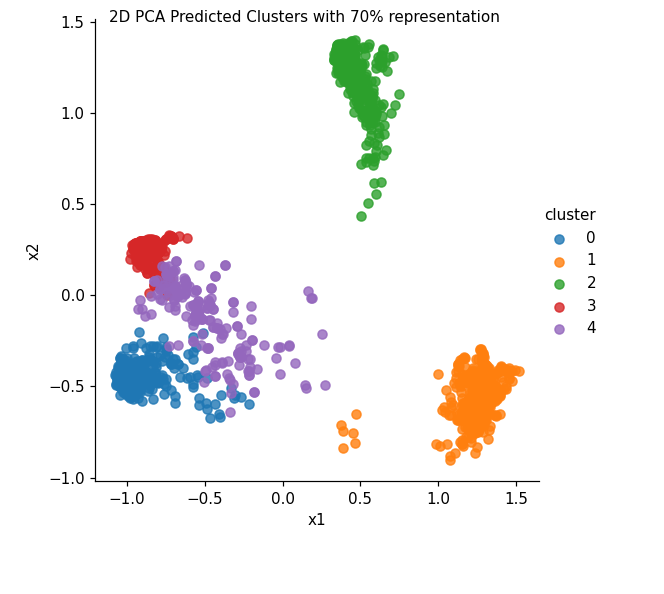

Text(0.5, 0.98, '2D PCA Predicted Clusters with 70% representation')

In [16]:
dfPCA2 = dfPCA[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dfPCA2, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters with 70% representation", fontsize=10)

<IPython.core.display.Javascript object>


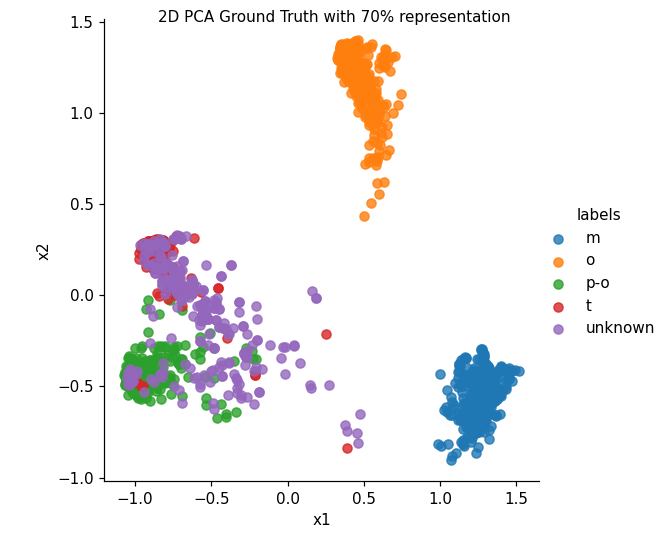

Text(0.5, 0.98, '2D PCA Ground Truth with 70% representation')

In [22]:
dfPCA['labels'] = dfPCA['labels'].replace({0: 'm', 1:'p-o', 2:'o', 3: 't', 4: 'unknown'})
dfPCA
dfPCA2_true = dfPCA[['x1', 'x2', 'labels']]
lm = sns.lmplot(data=dfPCA2_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth with 70% representation", fontsize=10)

In [23]:
import plotly.express as px
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [24]:
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()